## Big Data Using Python
## Nama: **Diaz Islami**
## No. Registrasi: **19584291110-19** <br>
## Judul Projek: **Sistem Rekomendasi Film**


Sistem rekomendasi film yang dibangun menggunakan open dataset yang bersumber dari Kaggle yang dibuat oleh **Harshit Shankhdhar**. Dataset tersebut terdiri dari kolom:

*   **Poster_Link** - Tautan poster yang digunakan imdb
*   **Series_Title** - Nama film
*   **Released_Year** - Tahun saat film itu dirilis
*   **Certificate** - Sertifikat yang diperoleh oleh film itu
*   **Runtime** - Total waktu tayang film tersebut
*   **Genre** - Genre film tersebut
*   **IMDB_Rating** - Peringkat film di situs IMDB
*   **Overview** - Cerita mini / ringkasan
*   **Meta_score** - Skor yang diperoleh film tersebut
*   **Director** - Nama sutradara
*   **Star1, Star2, Star3, Star4** - Nama aktor
*   **No_of_votes** - Jumlah total suara
*   **Gross** - Uang yang diperoleh dari film tersebut

Dataset tersebut dapat dilihat melalui [link ini](https://www.kaggle.com/datasets/harshitshankhdhar/imdb-dataset-of-top-1000-movies-and-tv-shows/data). Sistem rekomendasi yang dibangun menggunakan metode content-based filtering.



In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import linear_kernel
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from math import sqrt

In [2]:
df = pd.read_csv("/content/imdb_top_1000.csv")

In [3]:
df.head()

,Poster_Link,Series_Title,Released_Year,Certificate,Runtime,Genre,IMDB_Rating,Overview,Meta_score,Director,Star1,Star2,Star3,Star4,No_of_Votes,Gross
0,https://m.media-amazon.com/images/M/MV5BMDFkYT...,The Shawshank Redemption,1994,A,142 min,Drama,9.3,Two imprisoned men bond over a number of years...,80.0,Frank Darabont,Tim Robbins,Morgan Freeman,Bob Gunton,William Sadler,2343110,"28,341,469"
1,https://m.media-amazon.com/images/M/MV5BM2MyNj...,The Godfather,1972,A,175 min,"Crime, Drama",9.2,An organized crime dynasty's aging patriarch t...,100.0,Francis Ford Coppola,Marlon Brando,Al Pacino,James Caan,Diane Keaton,1620367,"134,966,411"
2,https://m.media-amazon.com/images/M/MV5BMTMxNT...,The Dark Knight,2008,UA,152 min,"Action, Crime, Drama",9.0,When the menace known as the Joker wreaks havo...,84.0,Christopher Nolan,Christian Bale,Heath Ledger,Aaron Eckhart,Michael Caine,2303232,"534,858,444"
3,https://m.media-amazon.com/images/M/MV5BMWMwMG...,The Godfather: Part II,1974,A,202 min,"Crime, Drama",9.0,The early life and career of Vito Corleone in ...,90.0,Francis Ford Coppola,Al Pacino,Robert De Niro,Robert Duvall,Diane Keaton,1129952,"57,300,000"
4,https://m.media-amazon.com/images/M/MV5BMWU4N2...,12 Angry Men,1957,U,96 min,"Crime, Drama",9.0,A jury holdout attempts to prevent a miscarria...,96.0,Sidney Lumet,Henry Fonda,Lee J. Cobb,Martin Balsam,John Fiedler,689845,"4,360,000"


In [4]:
df.describe()

,IMDB_Rating,Meta_score,No_of_Votes
count,1000.000000,843.000000,1.000000e+03
mean,7.949300,77.971530,2.736929e+05
std,0.275491,12.376099,3.273727e+05
min,7.600000,28.000000,2.508800e+04
25%,7.700000,70.000000,5.552625e+04
50%,7.900000,79.000000,1.385485e+05
75%,8.100000,87.000000,3.741612e+05
max,9.300000,100.000000,2.343110e+06


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Poster_Link    1000 non-null   object 
 1   Series_Title   1000 non-null   object 
 2   Released_Year  1000 non-null   object 
 3   Certificate    899 non-null    object 
 4   Runtime        1000 non-null   object 
 5   Genre          1000 non-null   object 
 6   IMDB_Rating    1000 non-null   float64
 7   Overview       1000 non-null   object 
 8   Meta_score     843 non-null    float64
 9   Director       1000 non-null   object 
 10  Star1          1000 non-null   object 
 11  Star2          1000 non-null   object 
 12  Star3          1000 non-null   object 
 13  Star4          1000 non-null   object 
 14  No_of_Votes    1000 non-null   int64  
 15  Gross          831 non-null    object 
dtypes: float64(2), int64(1), object(13)
memory usage: 125.1+ KB


In [6]:
# Cek missing value dalam data
df.isnull().sum().rename("Jumlah Missing Value")

,Jumlah Missing Value
Poster_Link,0
Series_Title,0
Released_Year,0
Certificate,101
Runtime,0
Genre,0
IMDB_Rating,0
Overview,0
Meta_score,157
Director,0


In [7]:
# Cek duplikasi data
print("Jumlah duplikasi data: ", df.duplicated().sum())

Jumlah duplikasi data:  0


In [8]:
# Cek nilai unik dari setiap fitur
for i in range(1, df.shape[1]):
    print(f"Jumlah data unik dari kolom {df.columns[i]}: {len(df.iloc[:, i].unique())}")

Jumlah data unik dari kolom Series_Title: 999
Jumlah data unik dari kolom Released_Year: 100
Jumlah data unik dari kolom Certificate: 17
Jumlah data unik dari kolom Runtime: 140
Jumlah data unik dari kolom Genre: 202
Jumlah data unik dari kolom IMDB_Rating: 17
Jumlah data unik dari kolom Overview: 1000
Jumlah data unik dari kolom Meta_score: 64
Jumlah data unik dari kolom Director: 548
Jumlah data unik dari kolom Star1: 660
Jumlah data unik dari kolom Star2: 841
Jumlah data unik dari kolom Star3: 891
Jumlah data unik dari kolom Star4: 939
Jumlah data unik dari kolom No_of_Votes: 999
Jumlah data unik dari kolom Gross: 824


In [9]:
# Preprocessing data untuk melakukan visualisasi insight dari dataset
df['Gross'] = df['Gross'].str.replace(',', '')
df['Gross'] = df['Gross'].fillna(0).astype(float)
df['Runtime'] = df['Runtime'].str.replace(' min', '').astype(float)

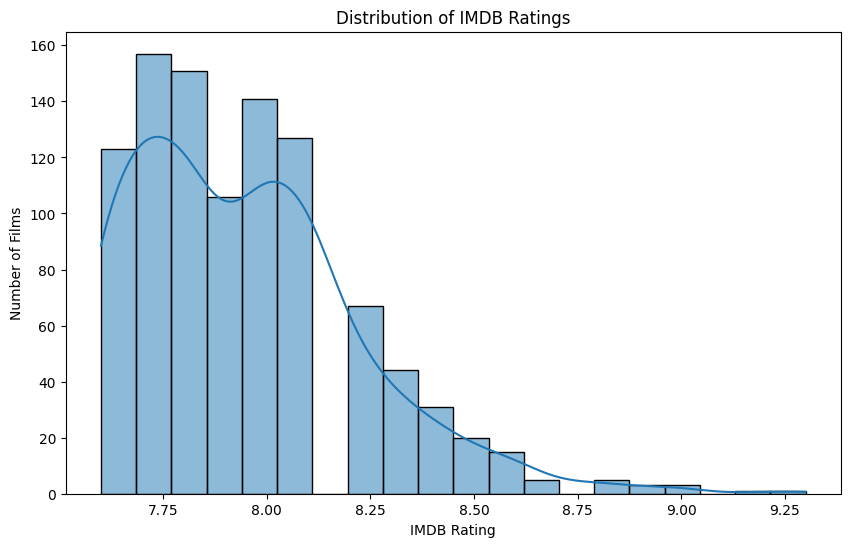

In [10]:
# Visualisasi distribusi rating Film
plt.figure(figsize=(10, 6))
sns.histplot(df['IMDB_Rating'], bins=20, kde=True)
plt.title('Distribution of IMDB Ratings')
plt.xlabel('IMDB Rating')
plt.ylabel('Number of Films')
plt.show()

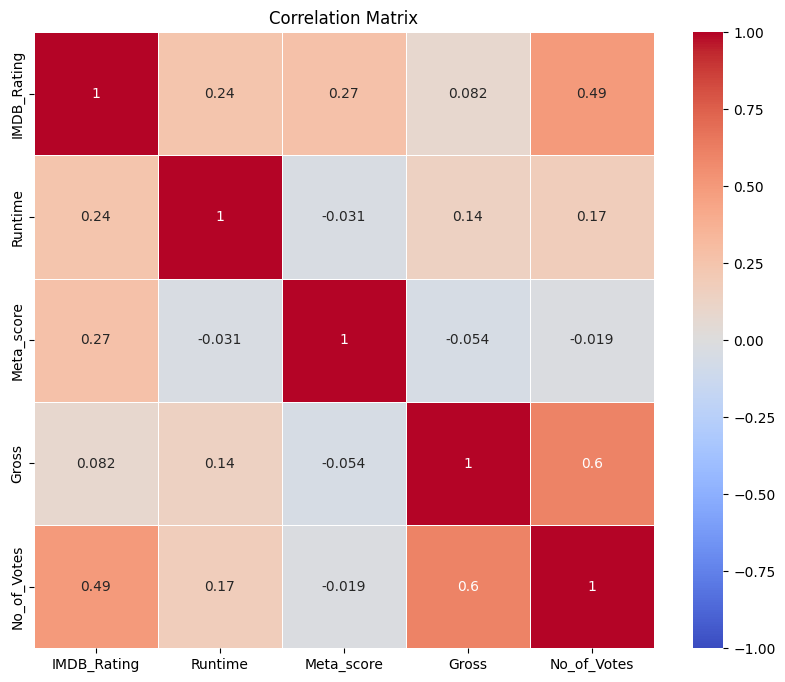

In [11]:
# Memilih fitur numerik untuk analisis korelasi fitur
numerical_features = df[['IMDB_Rating', 'Runtime', 'Meta_score', 'Gross', 'No_of_Votes']]

# Hitung matriks korelasi
corr_matrix = numerical_features.corr()

# Visualisasi matriks korelasi
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1, linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

In [12]:
# 7 Film dengan rating tertinggi
top_7_rating = df.nlargest(7, 'IMDB_Rating')[['Series_Title', 'IMDB_Rating']]

# 7 Film dengan pendapatan tertinggi
top_7_gross = df.nlargest(7, 'Gross')[['Series_Title', 'Gross']]

<ipython-input-13-530bf317d081>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='IMDB_Rating', y='Series_Title', data=top_7_rating, palette='viridis')


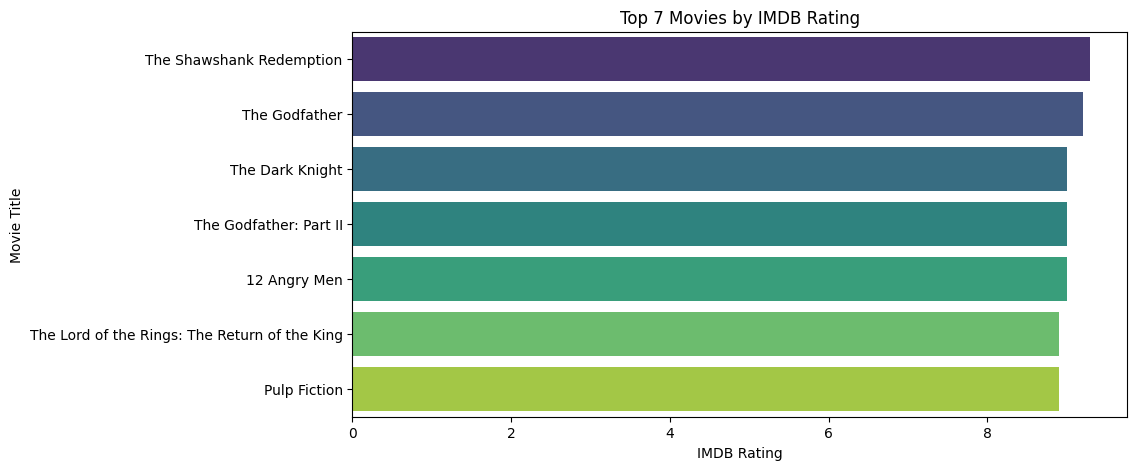

In [13]:
# Plotting 7 film dengan rating tertinggi
plt.figure(figsize=(10, 5))
sns.barplot(x='IMDB_Rating', y='Series_Title', data=top_7_rating, palette='viridis')
plt.title('Top 7 Movies by IMDB Rating')
plt.xlabel('IMDB Rating')
plt.ylabel('Movie Title')
plt.show()

<ipython-input-14-417744651654>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Gross', y='Series_Title', data=top_7_gross, palette='magma')


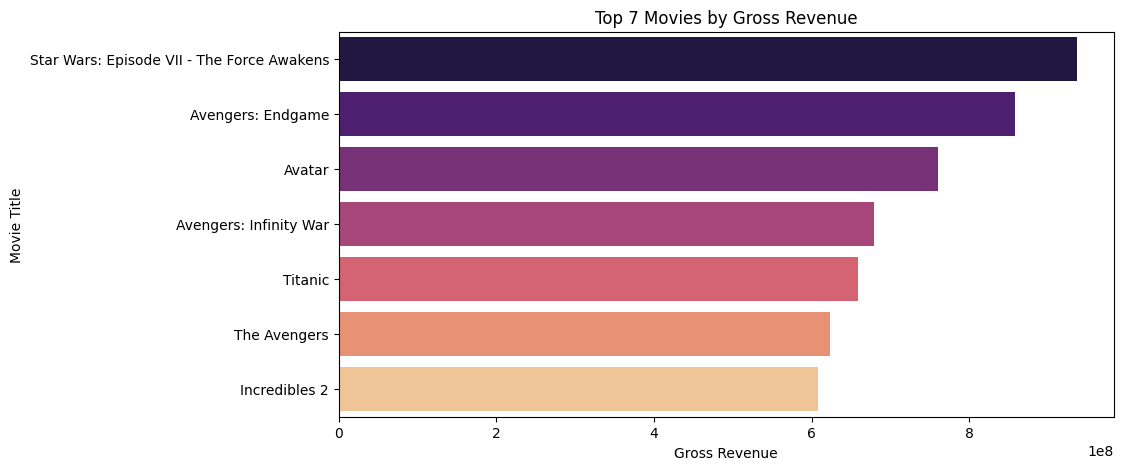

In [14]:
# Plotting 7 film dengan pendapatan tertinggi
plt.figure(figsize=(10, 5))
sns.barplot(x='Gross', y='Series_Title', data=top_7_gross, palette='magma')
plt.title('Top 7 Movies by Gross Revenue')
plt.xlabel('Gross Revenue')
plt.ylabel('Movie Title')
plt.show()

<ipython-input-15-4afdec5dd1fd>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Number_of_Films', y='Released_Year', data=top_10_years, palette='Blues_d')


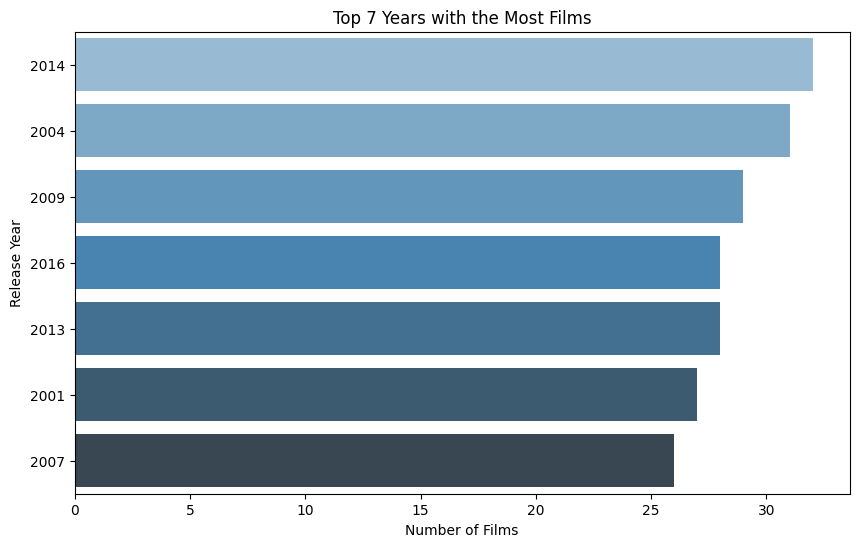

In [15]:
# Menghitung jumlah film per tahun
films_per_year = df['Released_Year'].value_counts().reset_index()
films_per_year.columns = ['Released_Year', 'Number_of_Films']

# Memilih 7 tahun dengan jumlah film terbanyak
top_10_years = films_per_year.nlargest(7, 'Number_of_Films')

# Plotting 7 Tahun dengan Jumlah Film Terbanyak
plt.figure(figsize=(10, 6))
sns.barplot(x='Number_of_Films', y='Released_Year', data=top_10_years, palette='Blues_d')
plt.title('Top 7 Years with the Most Films')
plt.xlabel('Number of Films')
plt.ylabel('Release Year')
plt.show()

In [16]:
# Menggabungkan fitur yang diperlukan untuk membangun sistem rekomendasi
df['Combined_Features'] = df['Genre'] + ' ' + df['Director'] + ' ' + df['Overview'] + ' ' + df['Star1'] + ' ' + df['Star2'] + ' ' + df['Star3'] + ' ' + df['Star4']

# Preprocessing fitur data untuk membangun sistem rekomendasi
df['Combined_Features'] = df['Combined_Features'].str.replace(',', '')
df['Combined_Features'] = df['Combined_Features'].str.lower()

In [17]:
df.head()

,Poster_Link,Series_Title,Released_Year,Certificate,Runtime,Genre,IMDB_Rating,Overview,Meta_score,Director,Star1,Star2,Star3,Star4,No_of_Votes,Gross,Combined_Features
0,https://m.media-amazon.com/images/M/MV5BMDFkYT...,The Shawshank Redemption,1994,A,142.0,Drama,9.3,Two imprisoned men bond over a number of years...,80.0,Frank Darabont,Tim Robbins,Morgan Freeman,Bob Gunton,William Sadler,2343110,28341469.0,drama frank darabont two imprisoned men bond o...
1,https://m.media-amazon.com/images/M/MV5BM2MyNj...,The Godfather,1972,A,175.0,"Crime, Drama",9.2,An organized crime dynasty's aging patriarch t...,100.0,Francis Ford Coppola,Marlon Brando,Al Pacino,James Caan,Diane Keaton,1620367,134966411.0,crime drama francis ford coppola an organized ...
2,https://m.media-amazon.com/images/M/MV5BMTMxNT...,The Dark Knight,2008,UA,152.0,"Action, Crime, Drama",9.0,When the menace known as the Joker wreaks havo...,84.0,Christopher Nolan,Christian Bale,Heath Ledger,Aaron Eckhart,Michael Caine,2303232,534858444.0,action crime drama christopher nolan when the ...
3,https://m.media-amazon.com/images/M/MV5BMWMwMG...,The Godfather: Part II,1974,A,202.0,"Crime, Drama",9.0,The early life and career of Vito Corleone in ...,90.0,Francis Ford Coppola,Al Pacino,Robert De Niro,Robert Duvall,Diane Keaton,1129952,57300000.0,crime drama francis ford coppola the early lif...
4,https://m.media-amazon.com/images/M/MV5BMWU4N2...,12 Angry Men,1957,U,96.0,"Crime, Drama",9.0,A jury holdout attempts to prevent a miscarria...,96.0,Sidney Lumet,Henry Fonda,Lee J. Cobb,Martin Balsam,John Fiedler,689845,4360000.0,crime drama sidney lumet a jury holdout attemp...


In [18]:
# Content-based filtering menggunakan TF-IDF
tfidf = TfidfVectorizer(stop_words='english')
tfidf_matrix = tfidf.fit_transform(df['Combined_Features'])

In [19]:
# Hitung cosine similarity matrix
cosine_sim = linear_kernel(tfidf_matrix, tfidf_matrix)

In [20]:
# Content-based filtering recommendation system
def cb_recommendations(title, cosine_sim=cosine_sim, df=df):
    idx = df[df['Series_Title'] == title].index[0]
    sim_scores = list(enumerate(cosine_sim[idx]))
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)
    movie_indices = [i[0] for i in sim_scores[1:11]]
    return df['Series_Title'].iloc[movie_indices]

In [21]:
# Contoh rekomendasi
print(cb_recommendations('The Godfather'))

974     The Godfather: Part III
3        The Godfather: Part II
74               Apocalypse Now
305           On the Waterfront
823         Glengarry Glen Ross
693            The Conversation
649                 The Insider
447    A Streetcar Named Desire
194                Sherlock Jr.
484                The Irishman
Name: Series_Title, dtype: object
